---
# Setup

* imports, 
* global constants (paths, time format, order of conditions)

---

In [38]:
# Imports and untilities from functions.ipynb

%run functions.ipynb

---
# Load Data

* load peaks
---

In [39]:
all_peaks = pd.read_csv(rf'{export_data}all_peaks.csv', sep=";")

peaks = all_peaks[all_peaks['Method'] == 'find_peaks_cwt']
turning_points = all_peaks[all_peaks['Method'] == 'find_peaks']

peaks = computeDifferenceZ(peaks)
turning_points = computeDifferenceZ(turning_points)
all_peaks = computeDifferenceZ(all_peaks)

display(peaks)
display(turning_points)
display(all_peaks)


,index,Unnamed: 0,Peak_Z,Peak_Layer,Method,Peaks1_Total,Peaks2_Total,Peaks_Total,ProbandId,Block,Trial,TrialNumber,Date,Condition,ResultLayer,ResultLayer_Relative,ResultLayer_Center,Diff_Z,Diff_Trial
0,17,17,-0.028,0,find_peaks_cwt,17,66,83,2,0,0,0,2022-08-01 14:14:01.092,No Feedback,5,0.714286,0.688000,0.000,1.0
1,18,18,-0.128,0,find_peaks_cwt,17,66,83,2,0,0,0,2022-08-01 14:14:01.124,No Feedback,5,0.714286,0.688000,-0.100,0.0
2,19,19,-0.220,1,find_peaks_cwt,17,66,83,2,0,0,0,2022-08-01 14:14:01.155,No Feedback,5,0.714286,0.688000,-0.092,0.0
3,20,20,-0.360,2,find_peaks_cwt,17,66,83,2,0,0,0,2022-08-01 14:14:01.184,No Feedback,5,0.714286,0.688000,-0.140,0.0
4,21,21,-0.020,0,find_peaks_cwt,17,66,83,2,0,0,0,2022-08-01 14:14:01.219,No Feedback,5,0.714286,0.688000,0.340,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50889,59293,21,-0.576,4,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.555,No Feedback,7,1.000000,0.938001,-0.052,0.0
50890,59294,22,-0.644,5,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.587,No Feedback,7,1.000000,0.938001,-0.068,0.0
50891,59295,23,-0.848,6,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.617,No Feedback,7,1.000000,0.938001,-0.204,0.0
50892,59296,24,-0.992,7,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.647,No Feedback,7,1.000000,0.938001,-0.144,0.0


,index,Unnamed: 0,Peak_Z,Peak_Layer,Method,Peaks1_Total,Peaks2_Total,Peaks_Total,ProbandId,Block,Trial,TrialNumber,Date,Condition,ResultLayer,ResultLayer_Relative,ResultLayer_Center,Diff_Z,Diff_Trial
0,0,0,-0.128000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.583,No Feedback,5,0.714286,0.688000,0.000,1.0
1,1,1,-0.220000,1,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.615,No Feedback,5,0.714286,0.688000,-0.092,0.0
2,2,2,0.000000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.645,No Feedback,5,0.714286,0.688000,0.220,0.0
3,3,3,-0.100000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.676,No Feedback,5,0.714286,0.688000,-0.100,0.0
4,4,4,0.000000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.707,No Feedback,5,0.714286,0.688000,0.100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8399,59241,10,-0.212000,1,find_peaks,11,30,41,23,3,19,82,2022-08-23 11:28:52.097,No Feedback,1,0.142857,0.188000,0.572,0.0
8400,59272,0,-0.860000,6,find_peaks,4,22,26,23,3,20,83,2022-08-23 11:29:32.930,No Feedback,7,1.000000,0.938001,0.000,1.0
8401,59273,1,-1.000001,0,find_peaks,4,22,26,23,3,20,83,2022-08-23 11:29:32.963,No Feedback,7,1.000000,0.938001,-0.140,0.0
8402,59274,2,-0.932001,7,find_peaks,4,22,26,23,3,20,83,2022-08-23 11:29:32.978,No Feedback,7,1.000000,0.938001,0.068,0.0


,index,Unnamed: 0,Peak_Z,Peak_Layer,Method,Peaks1_Total,Peaks2_Total,Peaks_Total,ProbandId,Block,Trial,TrialNumber,Date,Condition,ResultLayer,ResultLayer_Relative,ResultLayer_Center,Diff_Z,Diff_Trial
0,0,0,-0.128,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.583,No Feedback,5,0.714286,0.688000,0.000,1.0
1,1,1,-0.220,1,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.615,No Feedback,5,0.714286,0.688000,-0.092,0.0
2,2,2,0.000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.645,No Feedback,5,0.714286,0.688000,0.220,0.0
3,3,3,-0.100,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.676,No Feedback,5,0.714286,0.688000,-0.100,0.0
4,4,4,0.000,0,find_peaks,17,66,83,2,0,0,0,2022-08-01 14:14:00.707,No Feedback,5,0.714286,0.688000,0.100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,59293,21,-0.576,4,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.555,No Feedback,7,1.000000,0.938001,-0.052,0.0
59294,59294,22,-0.644,5,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.587,No Feedback,7,1.000000,0.938001,-0.068,0.0
59295,59295,23,-0.848,6,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.617,No Feedback,7,1.000000,0.938001,-0.204,0.0
59296,59296,24,-0.992,7,find_peaks_cwt,4,22,26,23,3,20,83,2022-08-23 11:29:33.647,No Feedback,7,1.000000,0.938001,-0.144,0.0


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,13636.000000,14028.000000,11523.000000,11707.000000
mean,-0.022825,-0.021318,-0.027572,-0.025939
std,0.206101,0.202686,0.209829,0.213635
min,-0.932001,-0.944001,-0.900000,-0.944001
25%,-0.120000,-0.120000,-0.124000,-0.124000
50%,-0.068000,-0.072000,-0.084000,-0.088000
75%,0.000000,0.000000,-0.020000,-0.008000
max,1.000001,0.976001,1.000001,0.980001


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,13636.000000,14028.000000,11523.000000,11707.000000
mean,-0.022825,-0.021318,-0.027572,-0.025939
std,0.206101,0.202686,0.209829,0.213635
min,-0.932001,-0.944001,-0.900000,-0.944001
25%,-0.120000,-0.120000,-0.124000,-0.124000
50%,-0.068000,-0.072000,-0.084000,-0.088000
75%,0.000000,0.000000,-0.020000,-0.008000
max,1.000001,0.976001,1.000001,0.980001


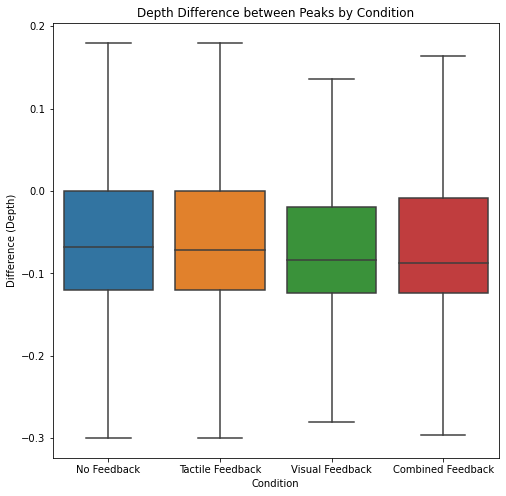

Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,2718.000000,2890.000000,1342.000000,1454.000000
mean,-0.079873,-0.074140,-0.106689,-0.101662
std,0.316755,0.315320,0.392041,0.410654
min,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.196000,-0.187000,-0.260000,-0.232000
50%,-0.020000,-0.020000,0.000000,0.000000
75%,0.004000,0.012000,0.000000,0.000000
max,0.872000,0.932001,0.912000,0.932001


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,2718.000000,2890.000000,1342.000000,1454.000000
mean,-0.079873,-0.074140,-0.106689,-0.101662
std,0.316755,0.315320,0.392041,0.410654
min,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.196000,-0.187000,-0.260000,-0.232000
50%,-0.020000,-0.020000,0.000000,0.000000
75%,0.004000,0.012000,0.000000,0.000000
max,0.872000,0.932001,0.912000,0.932001


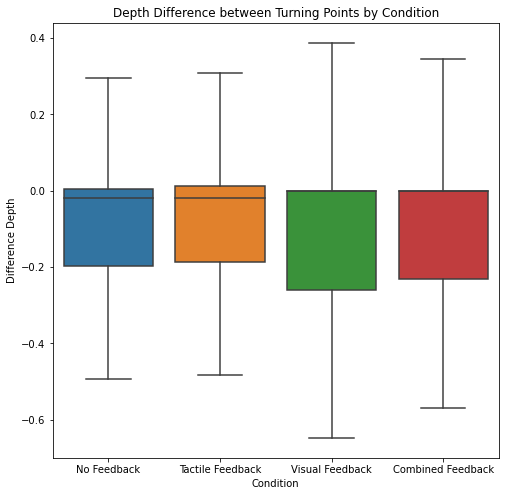

Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,16354.000000,16918.000000,12865.000000,13161.000000
mean,-0.009354,-0.008381,-0.005975,-0.005614
std,0.272366,0.268254,0.291422,0.295091
min,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.124000,-0.124000,-0.124000,-0.128000
50%,-0.068000,-0.068000,-0.080000,-0.084000
75%,0.008000,0.020000,0.000000,0.000000
max,1.000001,1.000001,1.000001,1.000001


Condition,No Feedback,Tactile Feedback,Visual Feedback,Combined Feedback
count,16354.000000,16918.000000,12865.000000,13161.000000
mean,-0.009354,-0.008381,-0.005975,-0.005614
std,0.272366,0.268254,0.291422,0.295091
min,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.124000,-0.124000,-0.124000,-0.128000
50%,-0.068000,-0.068000,-0.080000,-0.084000
75%,0.008000,0.020000,0.000000,0.000000
max,1.000001,1.000001,1.000001,1.000001


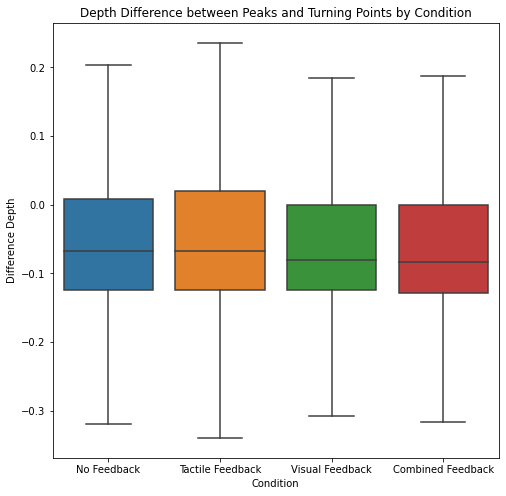

In [49]:
generateBoxPlotStats(peaks, ['Condition'], ['index'], 'Diff_Z', 'Condition', 'Difference (Depth)', 'Depth Difference between Peaks by Condition', 'diffPeaks_Condition', True, True, True, False)
generateBoxPlotStats(turning_points, ['Condition'], ['index'], 'Diff_Z', 'Condition', 'Difference Depth', 'Depth Difference between Turning Points by Condition', 'diffTurningPoints_Condition', True, True, True, False)
generateBoxPlotStats(all_peaks, ['Condition'], ['index'], 'Diff_Z', 'Condition', 'Difference Depth', 'Depth Difference between Peaks and Turning Points by Condition', 'diffAllPeaks_Condition', True, True, True, False)


ResultLayer,1,2,3,4,5,6,7
count,6878.000000,7032.000000,7425.000000,7628.000000,7445.000000,7495.000000,6991.000000
mean,-0.019919,-0.020779,-0.022671,-0.022834,-0.025681,-0.027510,-0.029846
std,0.221461,0.218417,0.208784,0.197256,0.191369,0.201607,0.216104
min,-0.756001,-0.932001,-0.728000,-0.900000,-0.760000,-0.944001,-0.944001
25%,-0.124000,-0.124000,-0.124000,-0.124000,-0.120000,-0.124000,-0.124000
50%,-0.080000,-0.080000,-0.076000,-0.074000,-0.072000,-0.076000,-0.080000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008000
max,0.980001,0.972001,1.000001,1.000001,0.968000,0.976001,0.980001


ResultLayer,1,2,3,4,5,6,7
count,6878.000000,7032.000000,7425.000000,7628.000000,7445.000000,7495.000000,6991.000000
mean,-0.019919,-0.020779,-0.022671,-0.022834,-0.025681,-0.027510,-0.029846
std,0.221461,0.218417,0.208784,0.197256,0.191369,0.201607,0.216104
min,-0.756001,-0.932001,-0.728000,-0.900000,-0.760000,-0.944001,-0.944001
25%,-0.124000,-0.124000,-0.124000,-0.124000,-0.120000,-0.124000,-0.124000
50%,-0.080000,-0.080000,-0.076000,-0.074000,-0.072000,-0.076000,-0.080000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008000
max,0.980001,0.972001,1.000001,1.000001,0.968000,0.976001,0.980001


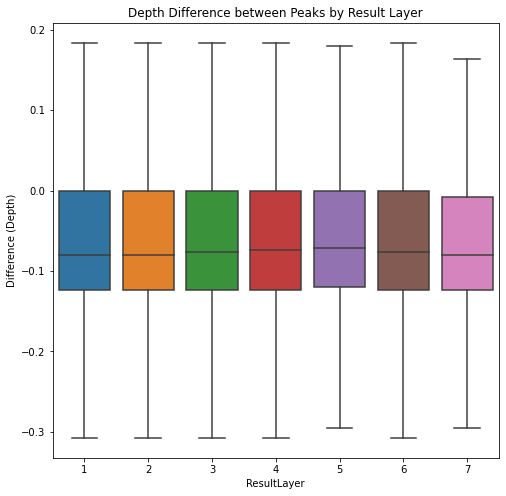

ResultLayer,1,2,3,4,5,6,7
count,1290.000000,1197.000000,1202.000000,1231.000000,1134.000000,1202.000000,1148.000000
mean,-0.051985,-0.081788,-0.087810,-0.088042,-0.098222,-0.098256,-0.099282
std,0.405574,0.397460,0.361845,0.331514,0.287324,0.298808,0.318276
min,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.200000,-0.212000,-0.243000,-0.206000,-0.211000,-0.187000,-0.177000
50%,0.000000,0.000000,0.000000,0.000000,-0.012000,0.000000,-0.012000
75%,0.024000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.912000,0.924001,0.912000,0.888001,0.888001,0.932001,0.932001


ResultLayer,1,2,3,4,5,6,7
count,1290.000000,1197.000000,1202.000000,1231.000000,1134.000000,1202.000000,1148.000000
mean,-0.051985,-0.081788,-0.087810,-0.088042,-0.098222,-0.098256,-0.099282
std,0.405574,0.397460,0.361845,0.331514,0.287324,0.298808,0.318276
min,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.200000,-0.212000,-0.243000,-0.206000,-0.211000,-0.187000,-0.177000
50%,0.000000,0.000000,0.000000,0.000000,-0.012000,0.000000,-0.012000
75%,0.024000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.912000,0.924001,0.912000,0.888001,0.888001,0.932001,0.932001


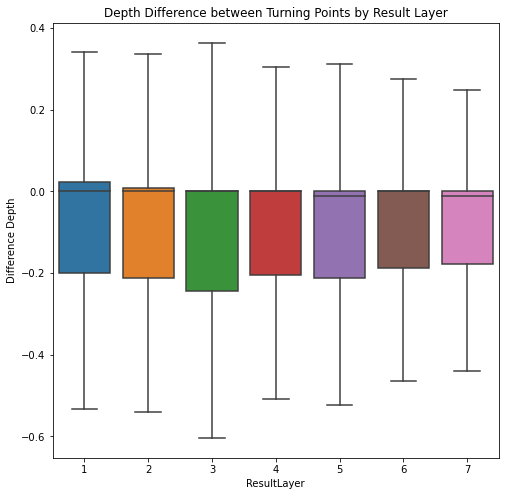

ResultLayer,1,2,3,4,5,6,7
count,8168.000000,8229.000000,8627.000000,8859.000000,8579.000000,8697.000000,8139.000000
mean,-0.004938,-0.007715,-0.008080,-0.006671,-0.007012,-0.008508,-0.009675
std,0.291266,0.288687,0.278595,0.270036,0.267043,0.277418,0.292025
min,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.128000,-0.128000,-0.124000,-0.124000,-0.124000,-0.124000,-0.124000
50%,-0.076000,-0.076000,-0.072000,-0.072000,-0.072000,-0.072000,-0.076000
75%,0.000000,0.004000,0.000000,0.016000,0.008000,0.000000,0.000000
max,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001


ResultLayer,1,2,3,4,5,6,7
count,8168.000000,8229.000000,8627.000000,8859.000000,8579.000000,8697.000000,8139.000000
mean,-0.004938,-0.007715,-0.008080,-0.006671,-0.007012,-0.008508,-0.009675
std,0.291266,0.288687,0.278595,0.270036,0.267043,0.277418,0.292025
min,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001,-1.000001
25%,-0.128000,-0.128000,-0.124000,-0.124000,-0.124000,-0.124000,-0.124000
50%,-0.076000,-0.076000,-0.072000,-0.072000,-0.072000,-0.072000,-0.076000
75%,0.000000,0.004000,0.000000,0.016000,0.008000,0.000000,0.000000
max,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001,1.000001


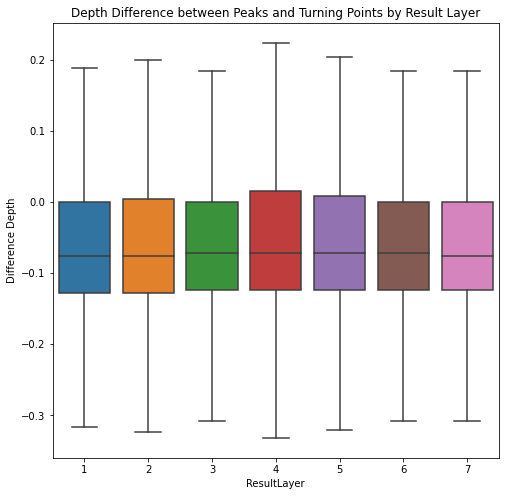

In [50]:
generateBoxPlotStats(peaks, ['ResultLayer'], ['index'], 'Diff_Z', 'ResultLayer', 'Difference (Depth)', 'Depth Difference between Peaks by Result Layer', 'diffPeaks_ResultLayer', True, True, False, False)
generateBoxPlotStats(turning_points, ['ResultLayer'], ['index'], 'Diff_Z', 'ResultLayer', 'Difference Depth', 'Depth Difference between Turning Points by Result Layer', 'diffTurningPoints_ResultLayer', True, True, False, False)
generateBoxPlotStats(all_peaks, ['ResultLayer'], ['index'], 'Diff_Z', 'ResultLayer', 'Difference Depth', 'Depth Difference between Peaks and Turning Points by Result Layer', 'diffAllPeaks_ResultLayer', True, True, False, False)


Peak_Layer,0,1,2,3,4,5,6,7
count,7210.000000,7056.000000,6907.000000,6239.000000,5982.000000,5917.000000,6348.000000,5235.000000
mean,0.205617,-0.030303,-0.071753,-0.074374,-0.067234,-0.061668,-0.057262,-0.078348
std,0.367915,0.222429,0.130378,0.103404,0.105128,0.103160,0.101497,0.087246
min,-0.748000,-0.248000,-0.368000,-0.484000,-0.616000,-0.740000,-0.868000,-0.944001
25%,-0.020000,-0.180000,-0.132000,-0.128000,-0.124000,-0.124000,-0.120000,-0.116000
50%,0.000000,-0.076000,-0.096000,-0.092000,-0.092000,-0.092000,-0.084000,-0.084000
75%,0.364000,0.016000,-0.040000,-0.048000,-0.044000,-0.036000,-0.016000,-0.036000
max,1.000001,0.868001,0.732000,0.592001,0.468000,0.368000,0.244000,0.120000


Peak_Layer,0,1,2,3,4,5,6,7
count,7210.000000,7056.000000,6907.000000,6239.000000,5982.000000,5917.000000,6348.000000,5235.000000
mean,0.205617,-0.030303,-0.071753,-0.074374,-0.067234,-0.061668,-0.057262,-0.078348
std,0.367915,0.222429,0.130378,0.103404,0.105128,0.103160,0.101497,0.087246
min,-0.748000,-0.248000,-0.368000,-0.484000,-0.616000,-0.740000,-0.868000,-0.944001
25%,-0.020000,-0.180000,-0.132000,-0.128000,-0.124000,-0.124000,-0.120000,-0.116000
50%,0.000000,-0.076000,-0.096000,-0.092000,-0.092000,-0.092000,-0.084000,-0.084000
75%,0.364000,0.016000,-0.040000,-0.048000,-0.044000,-0.036000,-0.016000,-0.036000
max,1.000001,0.868001,0.732000,0.592001,0.468000,0.368000,0.244000,0.120000


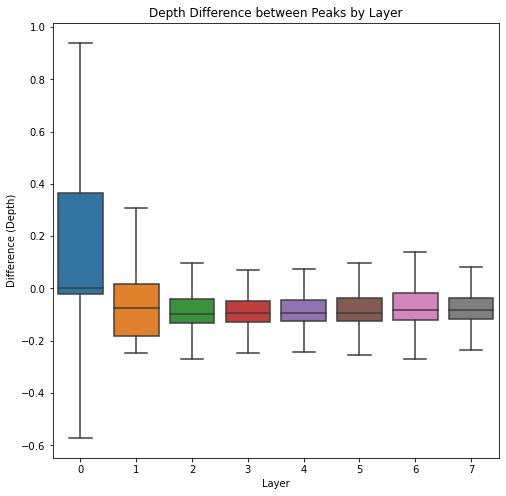

Peak_Layer,0,1,2,3,4,5,6,7
count,2865.000000,1111.000000,1357.000000,786.000000,512.000000,354.000000,399.000000,1020.000000
mean,-0.108610,0.058621,0.043107,-0.018443,-0.067664,-0.125345,-0.215870,-0.348200
std,0.373087,0.272072,0.296991,0.269232,0.263813,0.273998,0.315801,0.350050
min,-1.000001,-0.248000,-0.368000,-0.492000,-0.620000,-0.740000,-0.864000,-1.000001
25%,-0.148000,-0.086000,-0.128000,-0.155000,-0.240000,-0.345000,-0.456000,-0.676000
50%,0.000000,0.000000,-0.028000,-0.088000,-0.104000,-0.078000,-0.116000,-0.280000
75%,0.000000,0.048000,0.076000,0.012000,0.012000,0.028000,0.000000,0.000000
max,0.932001,0.844001,0.744001,0.624000,0.496000,0.364000,0.244000,0.112000


Peak_Layer,0,1,2,3,4,5,6,7
count,2865.000000,1111.000000,1357.000000,786.000000,512.000000,354.000000,399.000000,1020.000000
mean,-0.108610,0.058621,0.043107,-0.018443,-0.067664,-0.125345,-0.215870,-0.348200
std,0.373087,0.272072,0.296991,0.269232,0.263813,0.273998,0.315801,0.350050
min,-1.000001,-0.248000,-0.368000,-0.492000,-0.620000,-0.740000,-0.864000,-1.000001
25%,-0.148000,-0.086000,-0.128000,-0.155000,-0.240000,-0.345000,-0.456000,-0.676000
50%,0.000000,0.000000,-0.028000,-0.088000,-0.104000,-0.078000,-0.116000,-0.280000
75%,0.000000,0.048000,0.076000,0.012000,0.012000,0.028000,0.000000,0.000000
max,0.932001,0.844001,0.744001,0.624000,0.496000,0.364000,0.244000,0.112000


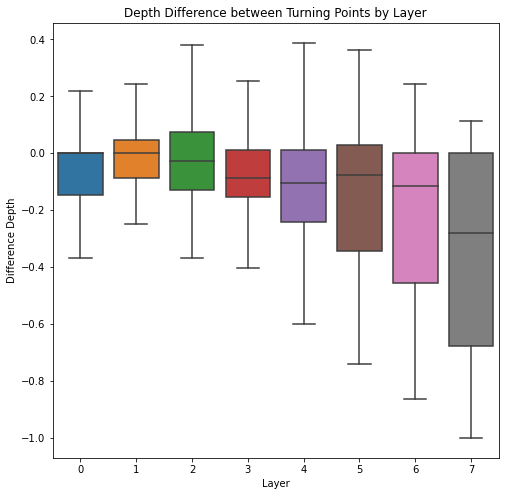

Peak_Layer,0,1,2,3,4,5,6,7
count,10075.000000,8167.000000,8264.000000,7025.000000,6494.000000,6271.000000,6747.000000,6255.000000
mean,0.265988,-0.018206,-0.052892,-0.068116,-0.067268,-0.065263,-0.066642,-0.122353
std,0.485147,0.231808,0.174620,0.133820,0.125131,0.120349,0.130292,0.190462
min,-1.000001,-0.248000,-0.368000,-0.492000,-0.620000,-0.740000,-0.868000,-1.000001
25%,-0.044000,-0.172000,-0.132000,-0.128000,-0.124000,-0.128000,-0.124000,-0.124000
50%,0.088000,-0.064000,-0.088000,-0.092000,-0.092000,-0.092000,-0.084000,-0.088000
75%,0.816000,0.020000,-0.028000,-0.044000,-0.044000,-0.032000,-0.012000,-0.032000
max,1.000001,0.868001,0.744001,0.624000,0.496000,0.368000,0.244000,0.120000


Peak_Layer,0,1,2,3,4,5,6,7
count,10075.000000,8167.000000,8264.000000,7025.000000,6494.000000,6271.000000,6747.000000,6255.000000
mean,0.265988,-0.018206,-0.052892,-0.068116,-0.067268,-0.065263,-0.066642,-0.122353
std,0.485147,0.231808,0.174620,0.133820,0.125131,0.120349,0.130292,0.190462
min,-1.000001,-0.248000,-0.368000,-0.492000,-0.620000,-0.740000,-0.868000,-1.000001
25%,-0.044000,-0.172000,-0.132000,-0.128000,-0.124000,-0.128000,-0.124000,-0.124000
50%,0.088000,-0.064000,-0.088000,-0.092000,-0.092000,-0.092000,-0.084000,-0.088000
75%,0.816000,0.020000,-0.028000,-0.044000,-0.044000,-0.032000,-0.012000,-0.032000
max,1.000001,0.868001,0.744001,0.624000,0.496000,0.368000,0.244000,0.120000


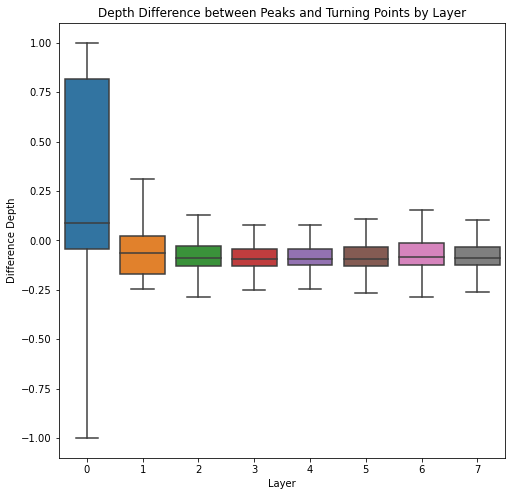

In [51]:
generateBoxPlotStats(peaks, ['Peak_Layer'], ['index'], 'Diff_Z', 'Layer', 'Difference (Depth)', 'Depth Difference between Peaks by Layer', 'diffPeaks_Layer', True, True, False, False)
generateBoxPlotStats(turning_points, ['Peak_Layer'], ['index'], 'Diff_Z', 'Layer', 'Difference Depth', 'Depth Difference between Turning Points by Layer', 'diffTurningPoints_Layer', True, True, False, False)
generateBoxPlotStats(all_peaks, ['Peak_Layer'], ['index'], 'Diff_Z', 'Layer', 'Difference Depth', 'Depth Difference between Peaks and Turning Points by Layer', 'diffAllPeaks_Layer', True, True, False, False)